In [1]:
from deepBreaks import preprocessing as prp
from deepBreaks import visualization as viz
from deepBreaks import models as ml
import os
import datetime
import warnings

In [2]:
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [3]:
#user param
seqFileName = '/Users/mbagh/Documents/RahLab/deepBreaks_data/hmp/s__Haemophilus_parainfluenzae.tsv'
metaDataFileName = '/Users/mbagh/Documents/RahLab/deepBreaks_data/hmp/my_HMP_metadata.tsv'
mt = 'Body_site'
seq_type = 'nu'
anaType = 'cl'
sampleFrac=1

In [4]:
# making directory
print('direcory preparation')
dt_label = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
seqFile = seqFileName.split('.')[0]
report_dir = str(seqFile +'_' + mt + '_' + dt_label)
os.makedirs(report_dir)

direcory preparation


In [5]:
%%time
print('reading meta-data')
metaData = prp.read_data(metaDataFileName, seq_type = None, is_main=False)
print('metaData:', metaData.shape)

# importing seq data
print('reading seq file')
df = prp.read_data(seqFileName, seq_type = seq_type, is_main=True)

positions = df.shape[1]
print('Done')
print('Shape of data is: ', df.shape)

reading meta-data
metaData: (2355, 3)
reading seq file
Done
Shape of data is:  (1111, 49839)
CPU times: user 1min 20s, sys: 3.84 s, total: 1min 24s
Wall time: 1min 25s


In [6]:
df = prp.balanced_classes(dat=df, meta_dat=metaData, feature=mt)

In [7]:
%%time
#taking care of missing data
print('Shape of data before missing/constant care: ', df.shape)
### add these steps to the powerpoint slide preproccess!
df_cleaned = prp.missing_constant_care(df)
print('Shape of data after missing/constant care: ', df_cleaned.shape)

Shape of data before missing/constant care:  (1006, 49839)
Shape of data after missing/constant care:  (1006, 12208)
CPU times: user 27.7 s, sys: 1.06 s, total: 28.8 s
Wall time: 28.8 s


In [8]:
%%time
print('Shape of data before imbalanced care: ', df_cleaned.shape)
df_cleaned = prp.imb_care(dat=df_cleaned, imbalance_threshold=0.05)
print('Shape of data after imbalanced care: ', df_cleaned.shape)

Shape of data before imbalanced care:  (1006, 12208)
Shape of data after imbalanced care:  (1006, 4562)
CPU times: user 10.7 s, sys: 82.6 ms, total: 10.8 s
Wall time: 10.7 s


In [9]:
print('number of columns of main data befor: ', df_cleaned.shape[1])
df_cleaned = prp.col_sampler(dat=df_cleaned, sample_frac=sampleFrac)
print('number of columns of main data after: ', df_cleaned.shape[1])

number of columns of main data befor:  4562
number of columns of main data after:  4562


In [10]:
%%time
print('number of columns of main data befor: ', df_cleaned.shape[1])
df_cleaned = prp.redundant_drop(dat=df_cleaned, meta_dat=metaData,
                                feature=mt, model_type=anaType, report_dir=report_dir)
print('number of columns of main data after: ', df_cleaned.shape[1])

number of columns of main data befor:  4562
number of columns of main data after:  4395
CPU times: user 13.5 s, sys: 85.7 ms, total: 13.5 s
Wall time: 13.5 s


In [11]:
%%time
print('calculating normalized mutual information')
cr = prp.vec_nmi(dat=df_cleaned, report_dir=report_dir)
print(cr.shape)

calculating normalized mutual information
(4395, 4395)
CPU times: user 5min 47s, sys: 24.5 s, total: 6min 11s
Wall time: 6min 12s


In [12]:
cr.head()

,p1369,p1395,p1398,p1407,p1408,p1411,p1440,p1443,p1462,p1472,...,p49369,p49393,p49402,p49408,p49411,p49775,p49787,p49808,p49811,p49820
p1369,1.000000,0.043633,0.027728,0.025392,0.032135,0.459656,0.038064,0.020430,0.415673,0.032400,...,0.002640,0.028384,0.002232,0.011869,0.031372,0.000845,0.002257,0.044000,0.045170,0.032364
p1395,0.043633,1.000000,0.000003,0.091349,0.028588,0.036849,0.041709,0.027327,0.031291,0.114606,...,0.004508,0.048024,0.003376,0.018990,0.081614,0.016894,0.016219,0.008652,0.015006,0.033302
p1398,0.027728,0.000003,1.000000,0.021344,0.016770,0.015405,0.047118,0.016119,0.026783,0.122012,...,0.003681,0.000886,0.001758,0.017195,0.004066,0.008986,0.003591,0.003771,0.000127,0.013674
p1407,0.025392,0.091349,0.021344,1.000000,0.018348,0.028902,0.400079,0.007141,0.012758,0.111170,...,0.010510,0.036908,0.000331,0.018825,0.006871,0.000615,0.020899,0.002757,0.006622,0.026961
p1408,0.032135,0.028588,0.016770,0.018348,1.000000,0.022266,0.020430,0.014020,0.022816,0.026273,...,0.007843,0.002981,0.013030,0.004613,0.021181,0.069582,0.007076,0.020430,0.025933,0.010292


In [13]:
print('finding colinear groups')
dc_df = prp.db_grouped(dat = cr, report_dir=report_dir, threshold=.8, needs_pivot=False)
dc_df.head()

finding colinear groups


,feature,group
5,p1411,g0
8,p1462,g0
15,p1542,g1
16,p1543,g1
22,p3263,g2


In [14]:
print('grouping features')
dc = prp.group_features(dat = dc_df, report_dir=report_dir)

grouping features


In [15]:
print('dropping correlated features')
print('Shape of data before colinearity care: ', df_cleaned.shape)
df_cleaned = prp.cor_remove(df_cleaned, dc)
print('Shape of data after colinearity care: ', df_cleaned.shape)

dropping correlated features
Shape of data before colinearity care:  (1006, 4395)
Shape of data after colinearity care:  (1006, 4206)


In [16]:
#merge with meta data
df = df.merge(metaData[mt], left_index=True, right_index=True)
df_cleaned = df_cleaned.merge(metaData[mt], left_index=True, right_index=True)

In [17]:
top_models, train_cols, model_names = ml.fit_models(dat = df_cleaned, meta_var=mt, 
                                                 model_type= anaType, models_to_select=3, report_dir=report_dir)

,Description,Value
0,session_id,123
1,Target,Body_site
2,Target Type,Multiclass
3,Label Encoded,"Buccal_mucosa: 0, Supragingival_plaque: 1, Tongue_dorsum: 2"
4,Original Data,"(1006, 4207)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,4206
8,Ordinal Features,False
9,High Cardinality Features,False


/Users/mbagh/Documents/RahLab/deepBreaks_data/hmp/s__Haemophilus_parainfluenzae_Body_site_2022-06-29_12-08-59/Extreme Gradient Boosting_350.png
Extreme Gradient Boosting  Done
/Users/mbagh/Documents/RahLab/deepBreaks_data/hmp/s__Haemophilus_parainfluenzae_Body_site_2022-06-29_12-08-59/Random Forest Classifier_350.png
Random Forest Classifier  Done
/Users/mbagh/Documents/RahLab/deepBreaks_data/hmp/s__Haemophilus_parainfluenzae_Body_site_2022-06-29_12-08-59/Light Gradient Boosting Machine_350.png
Light Gradient Boosting Machine  Done


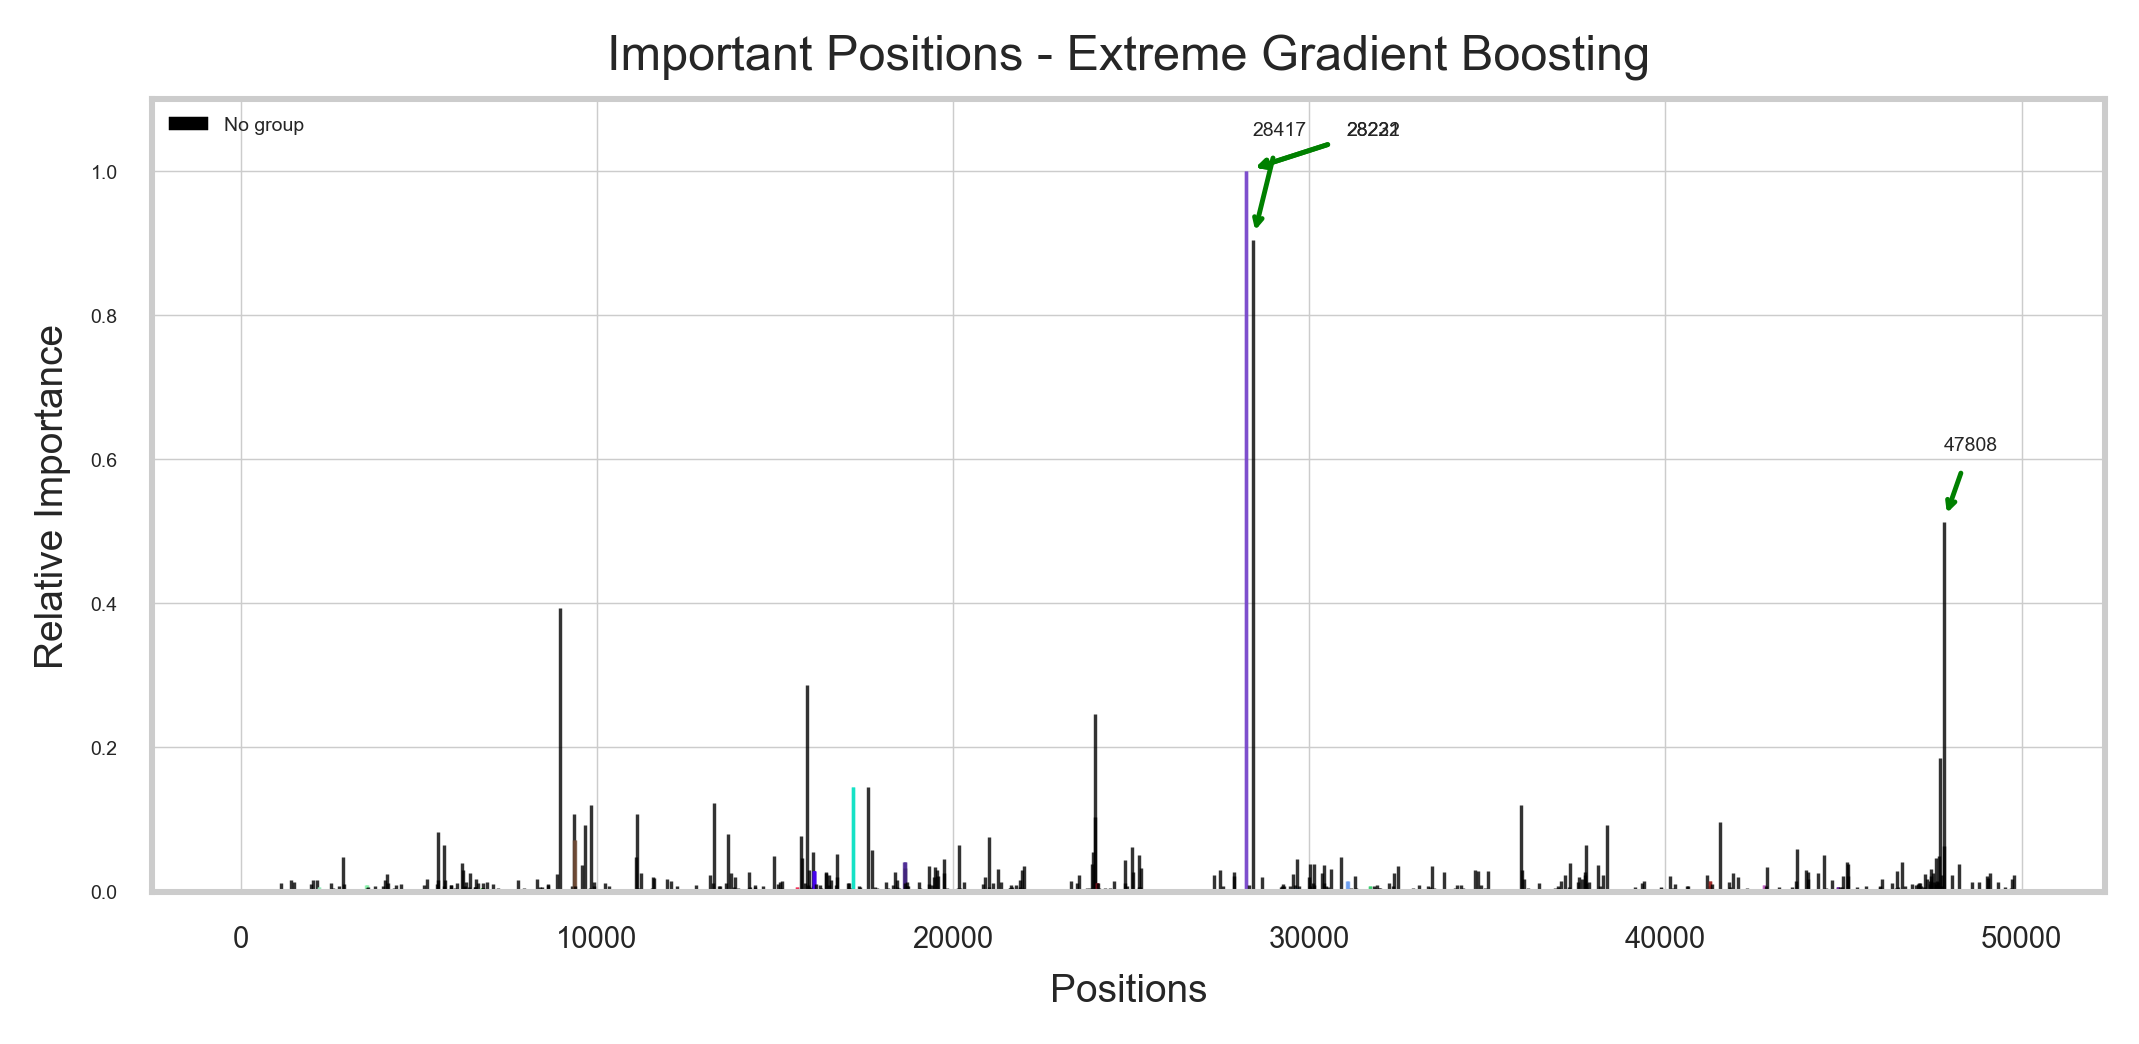

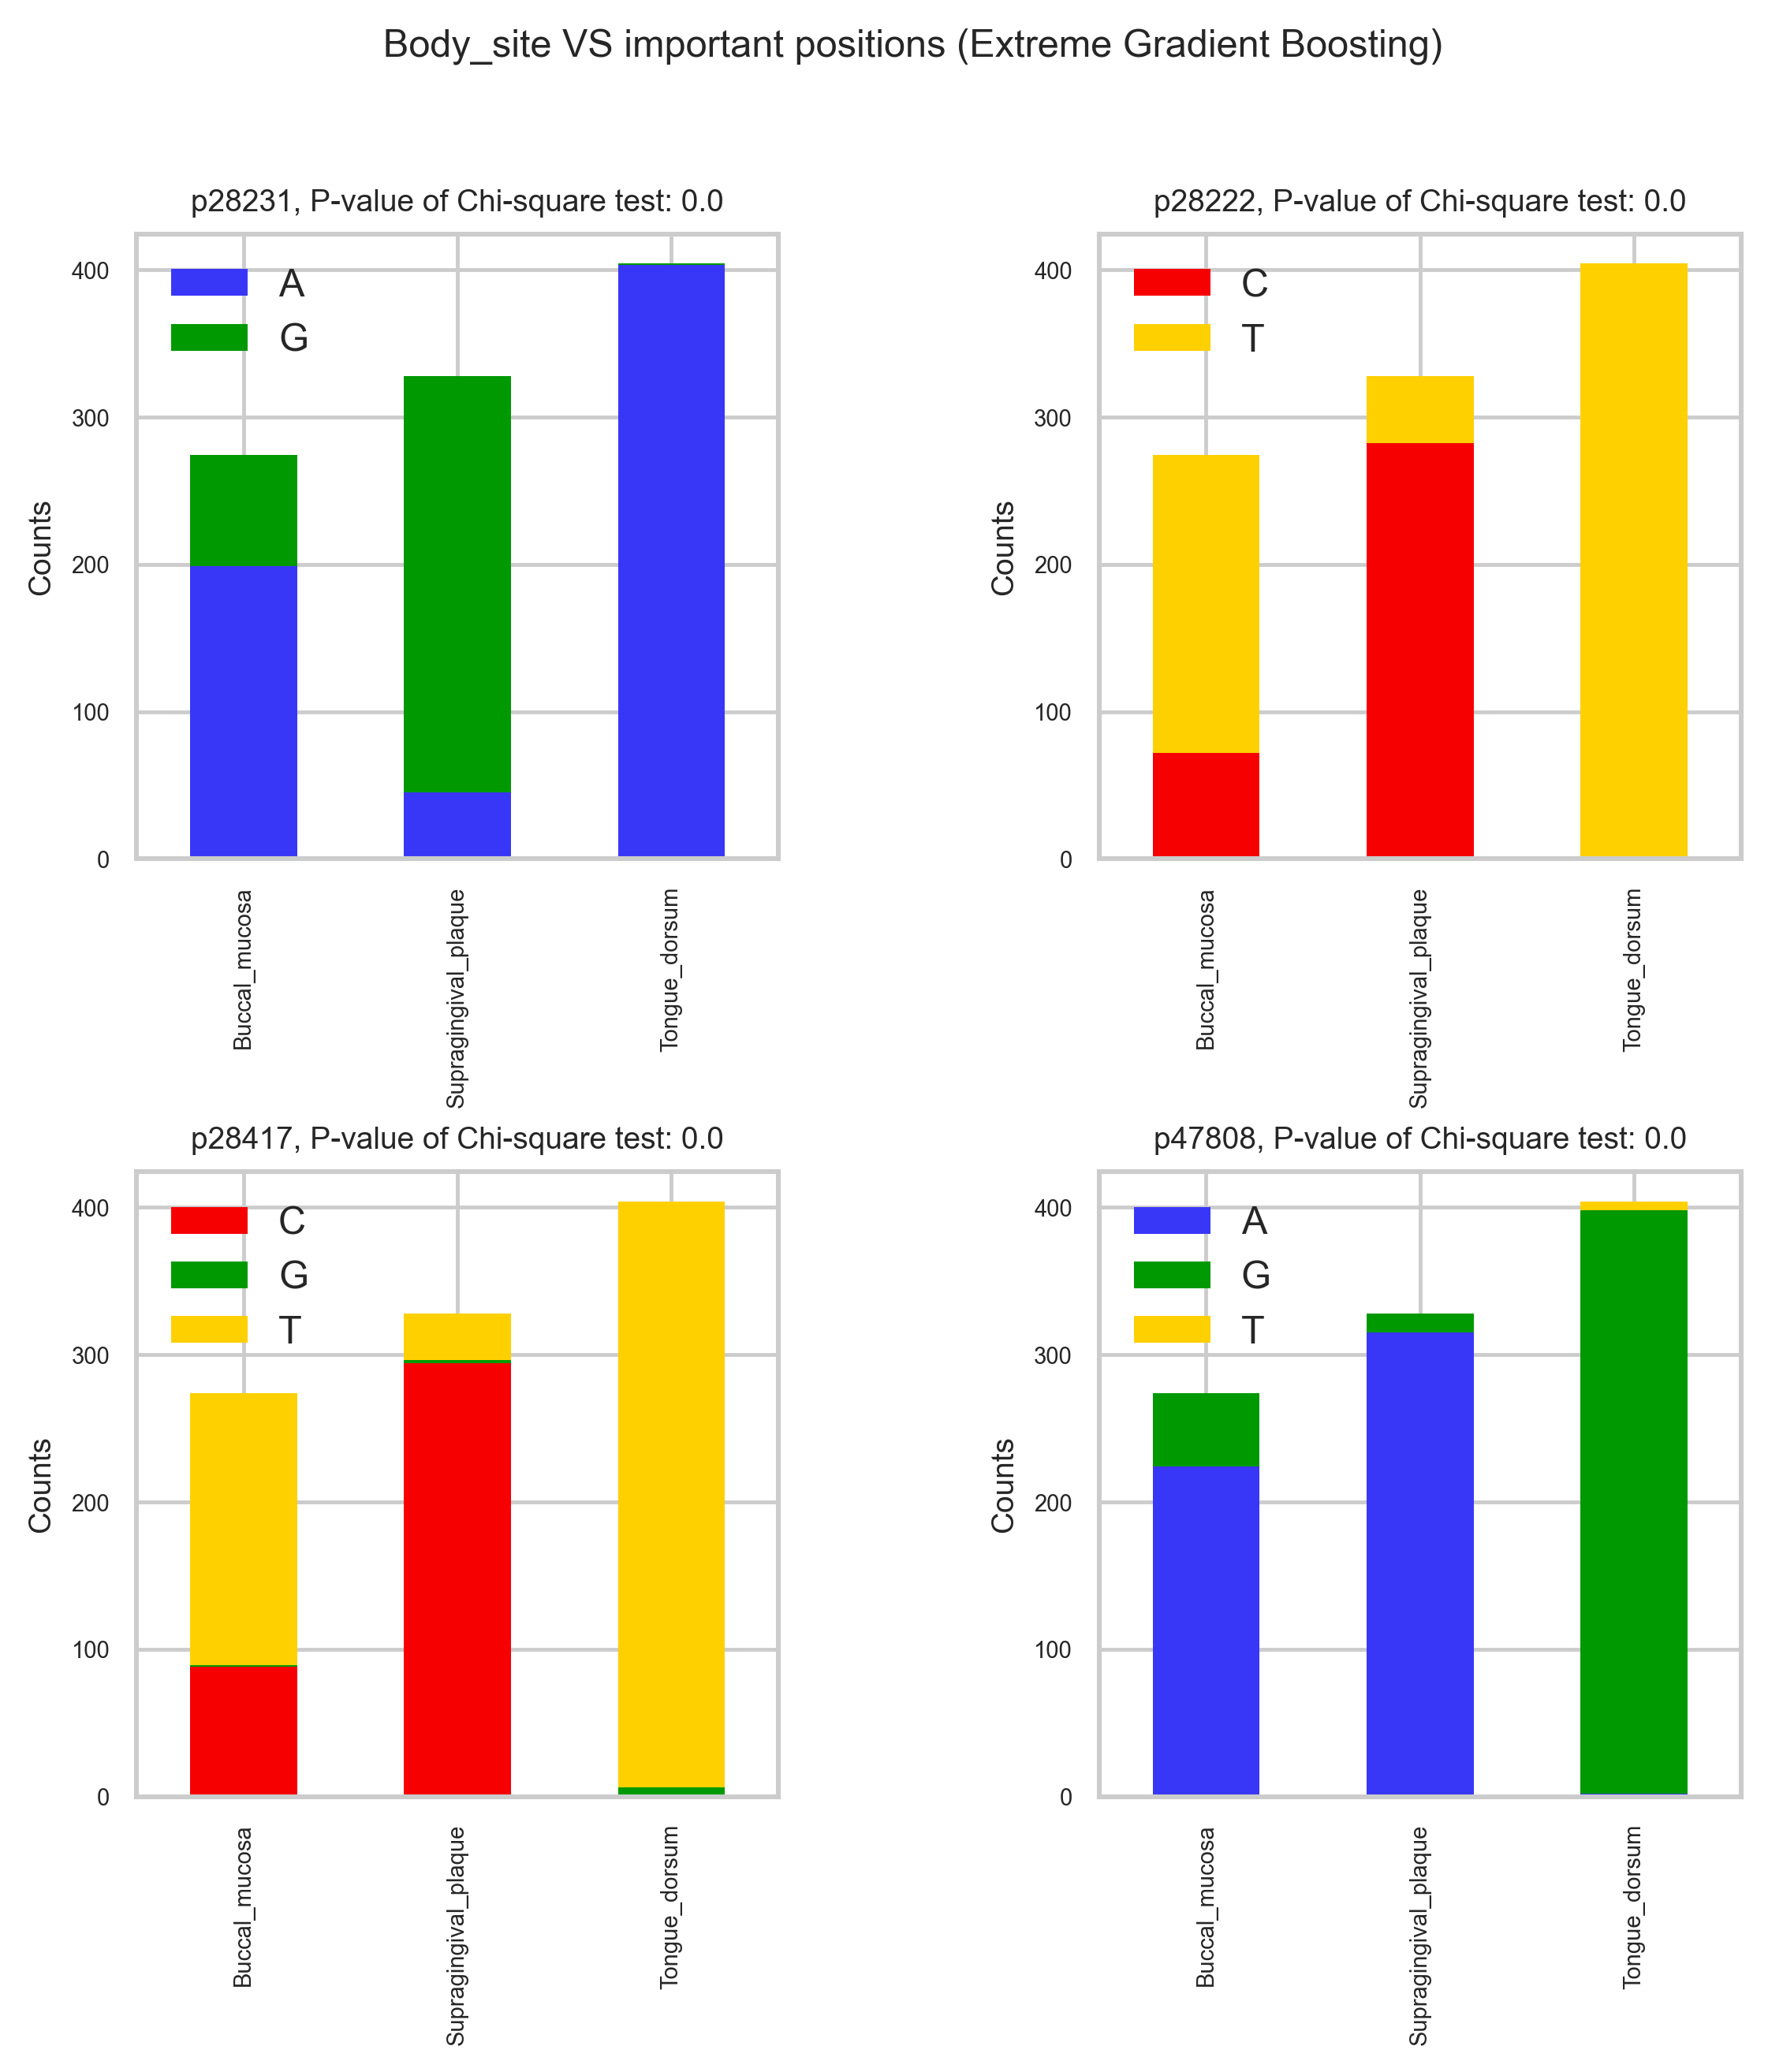

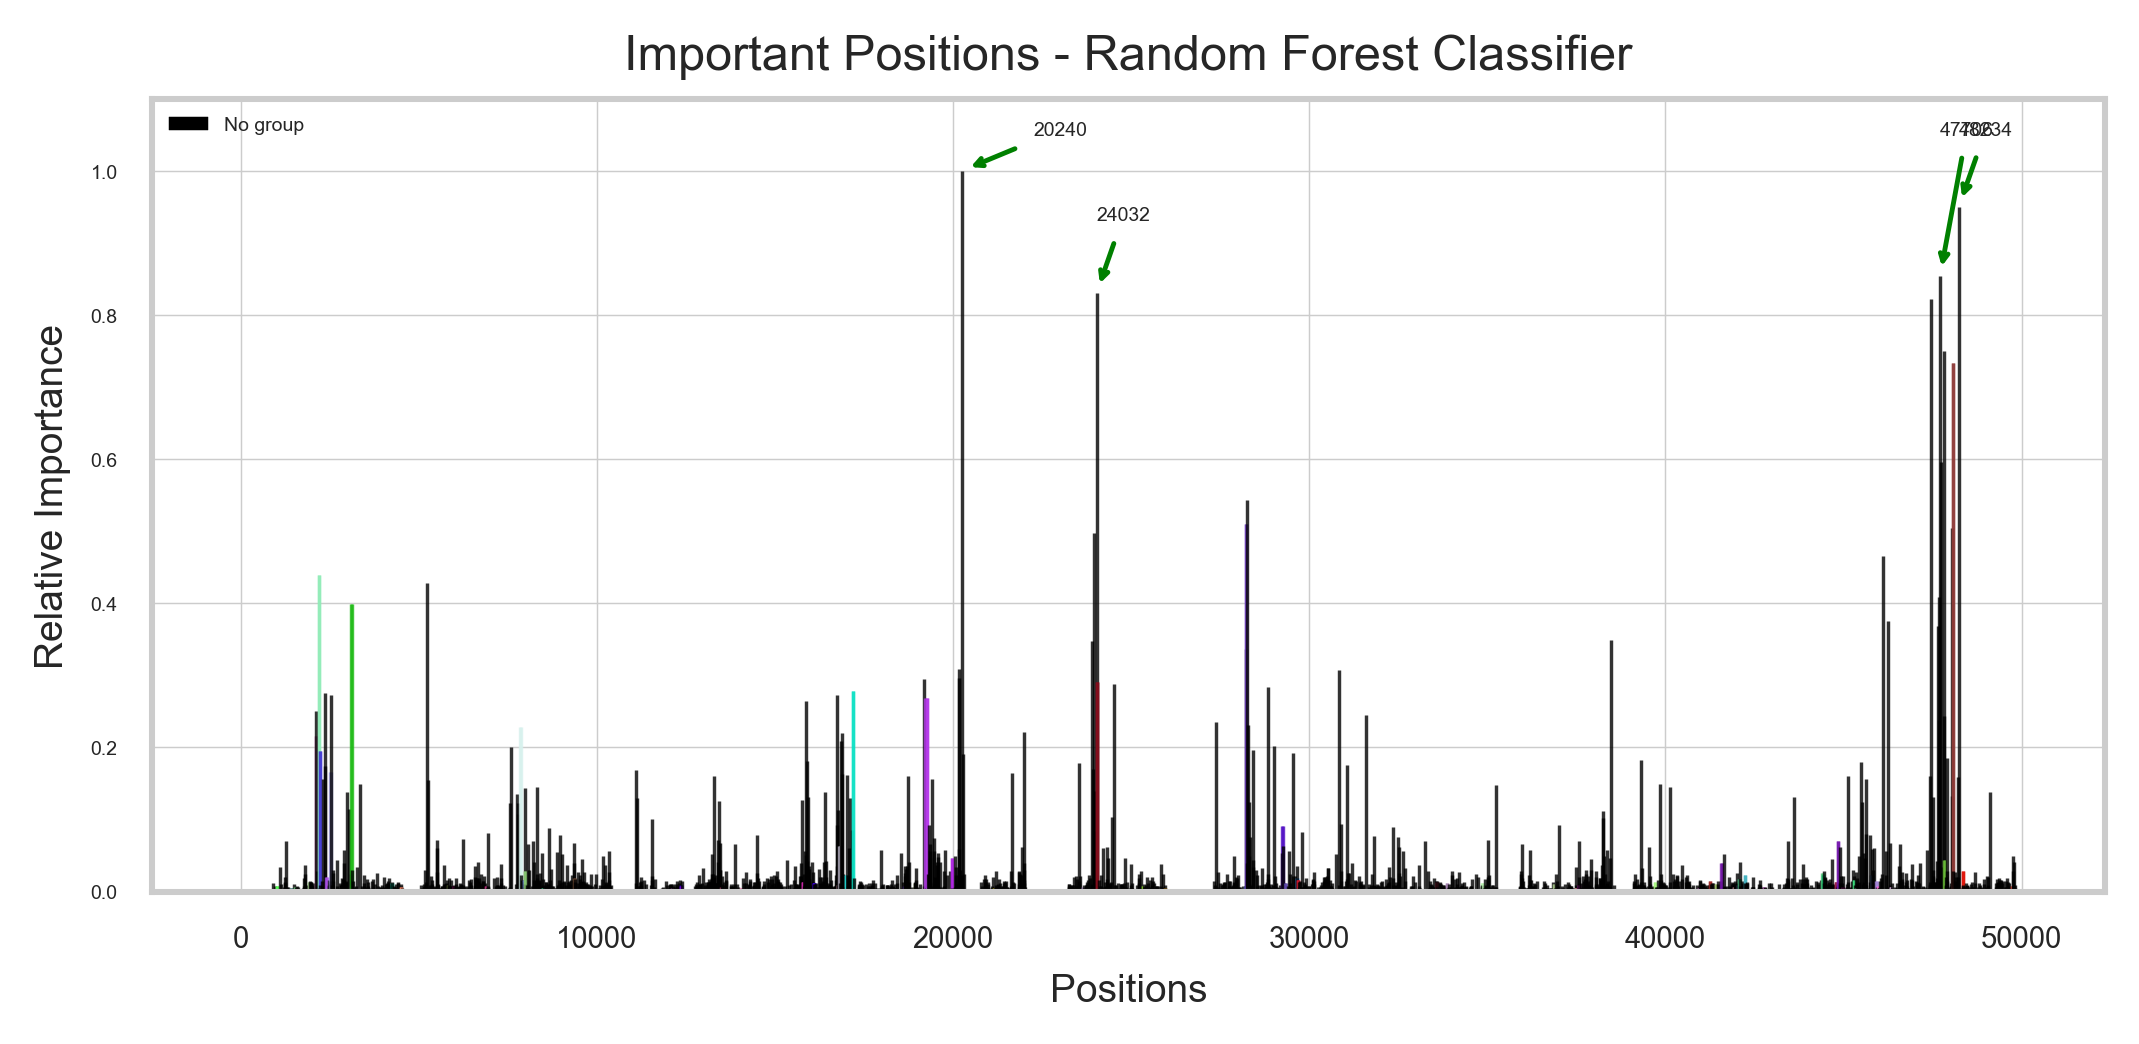

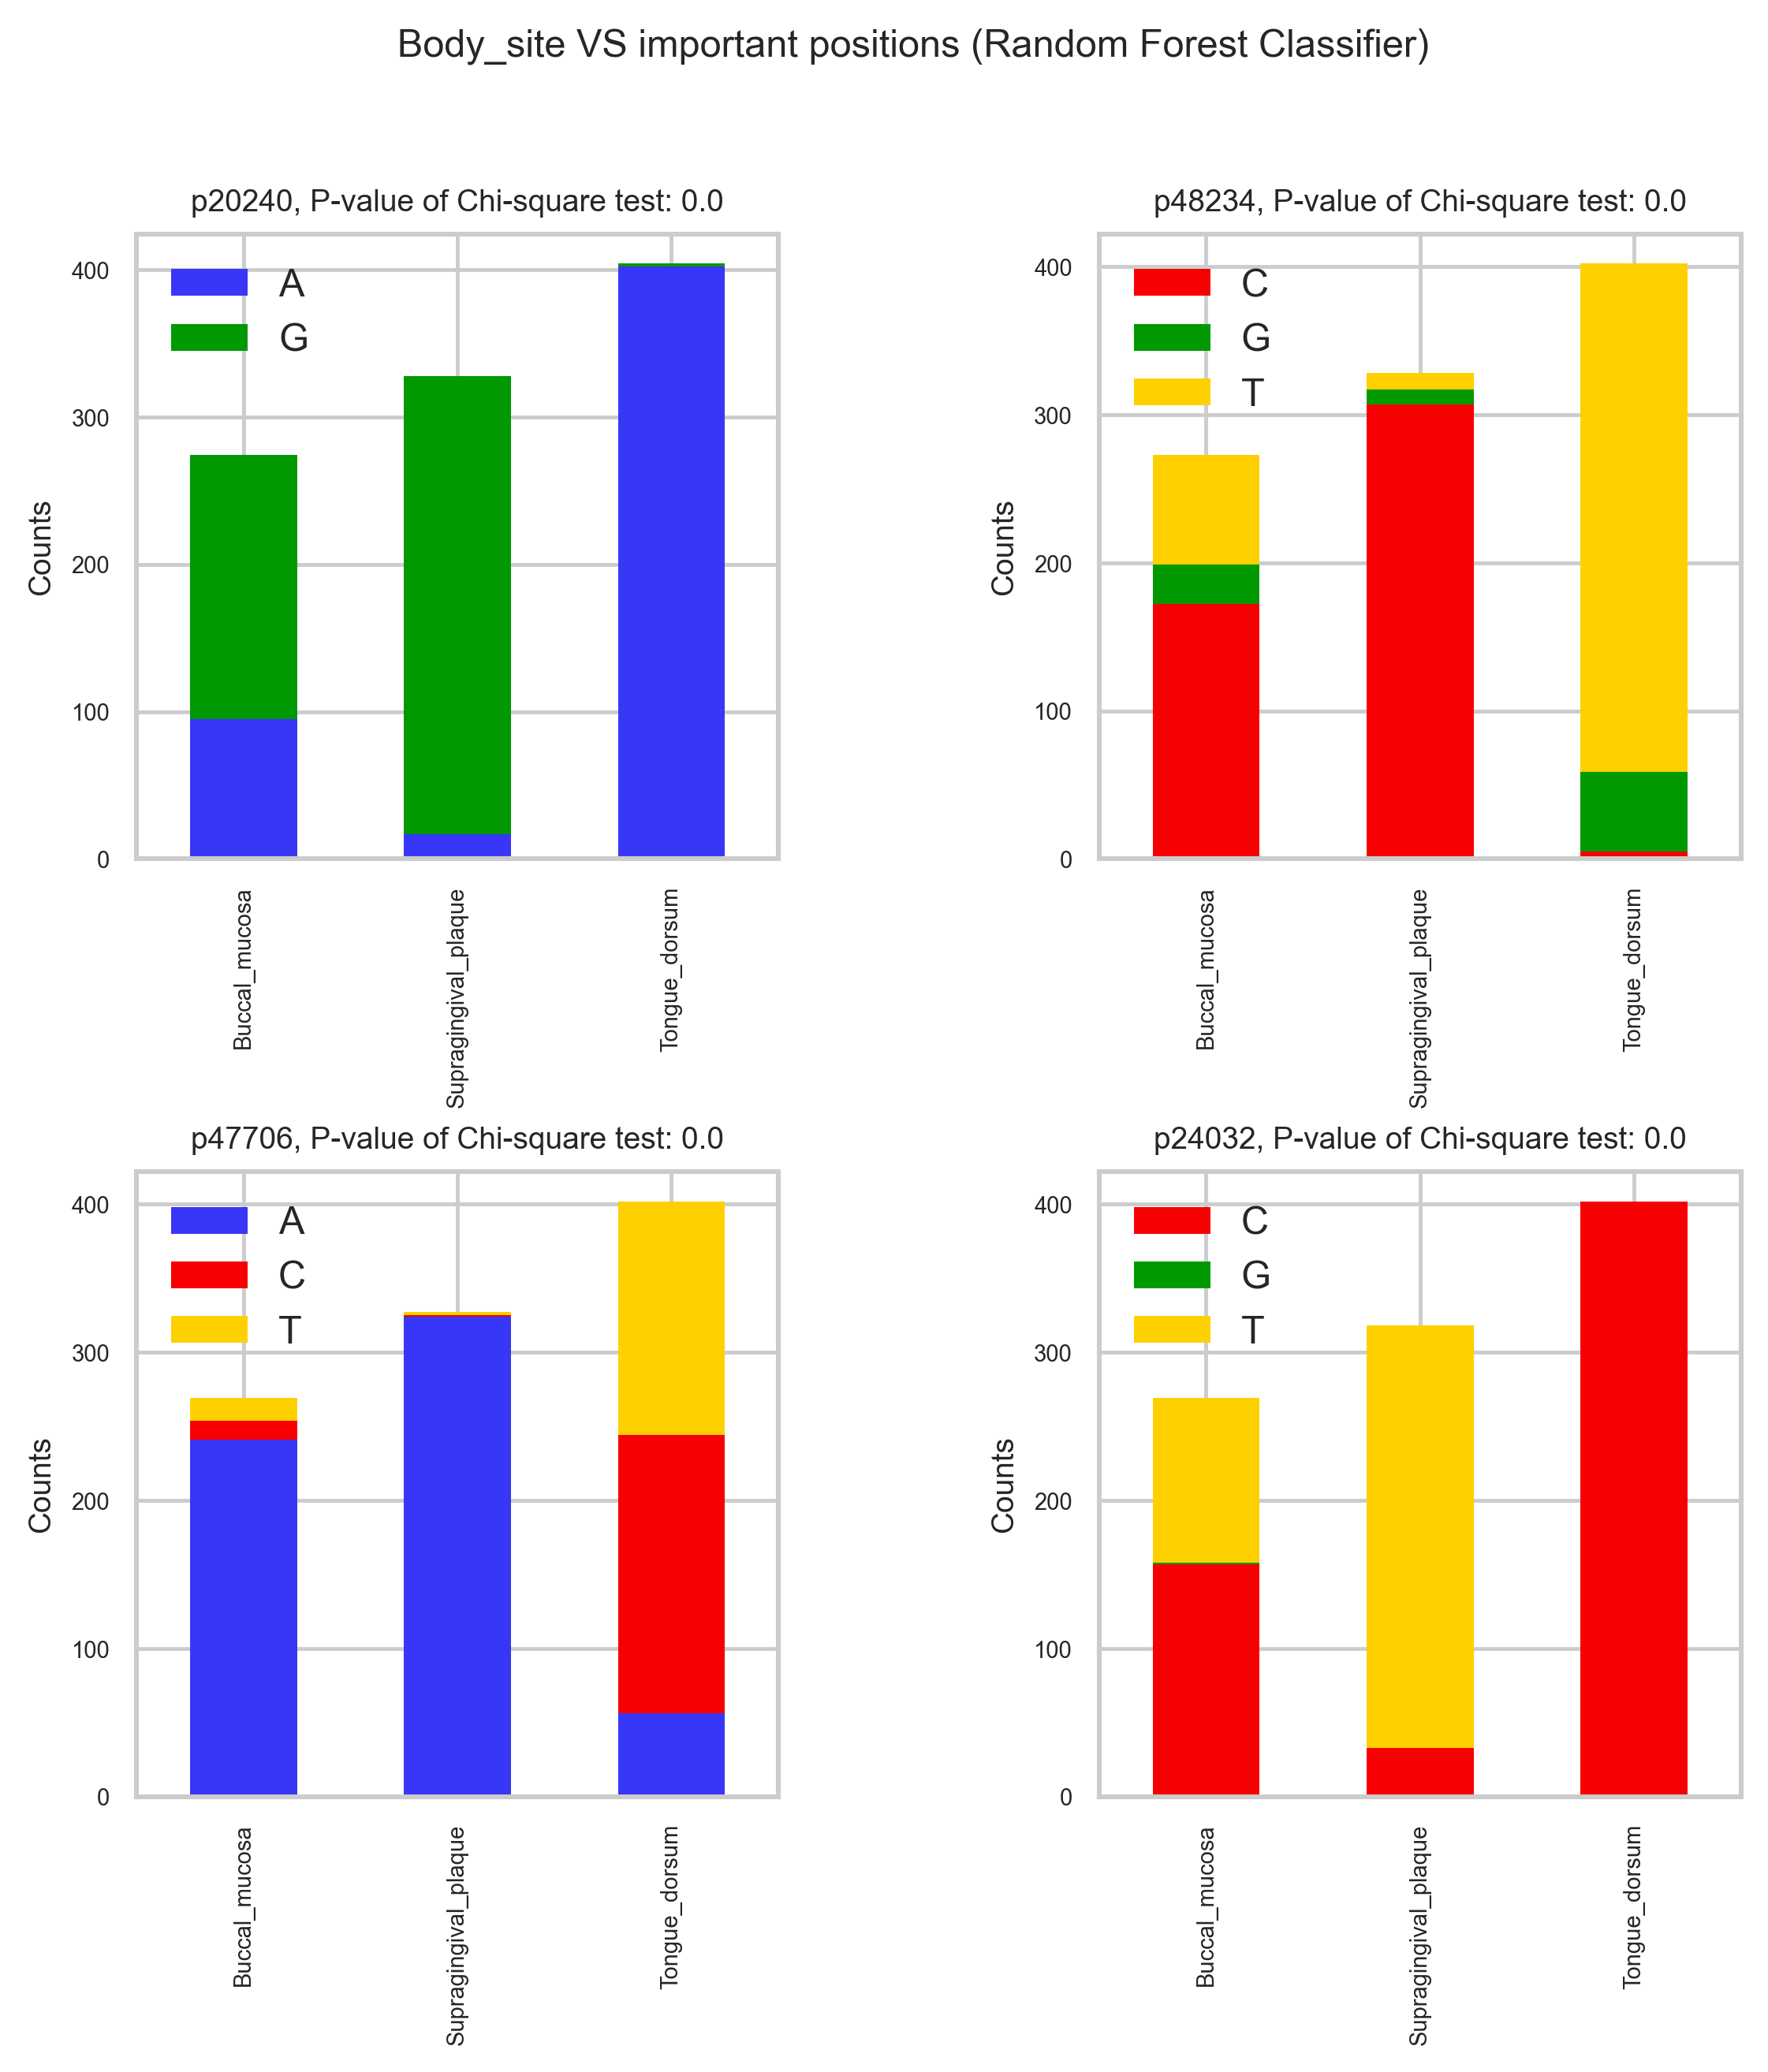

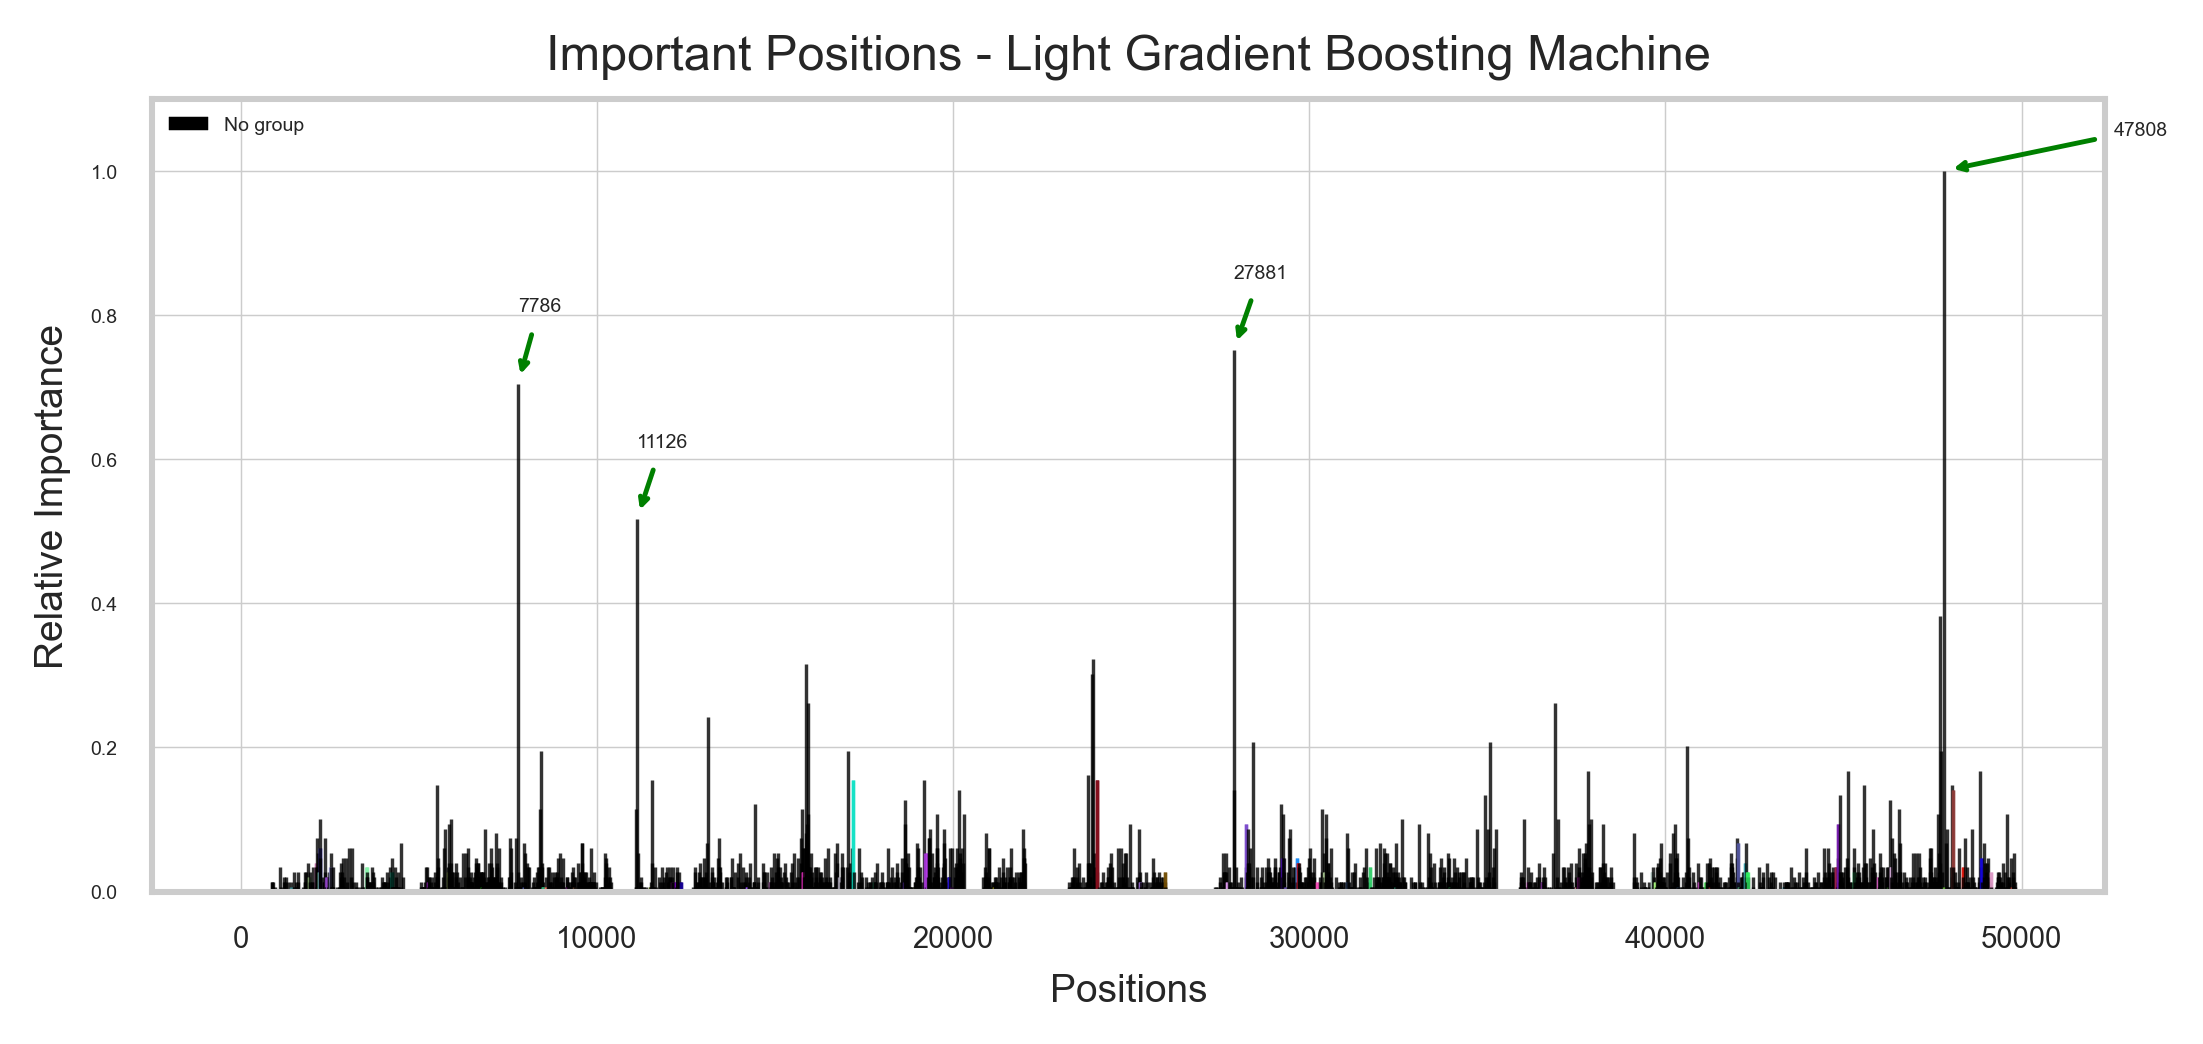

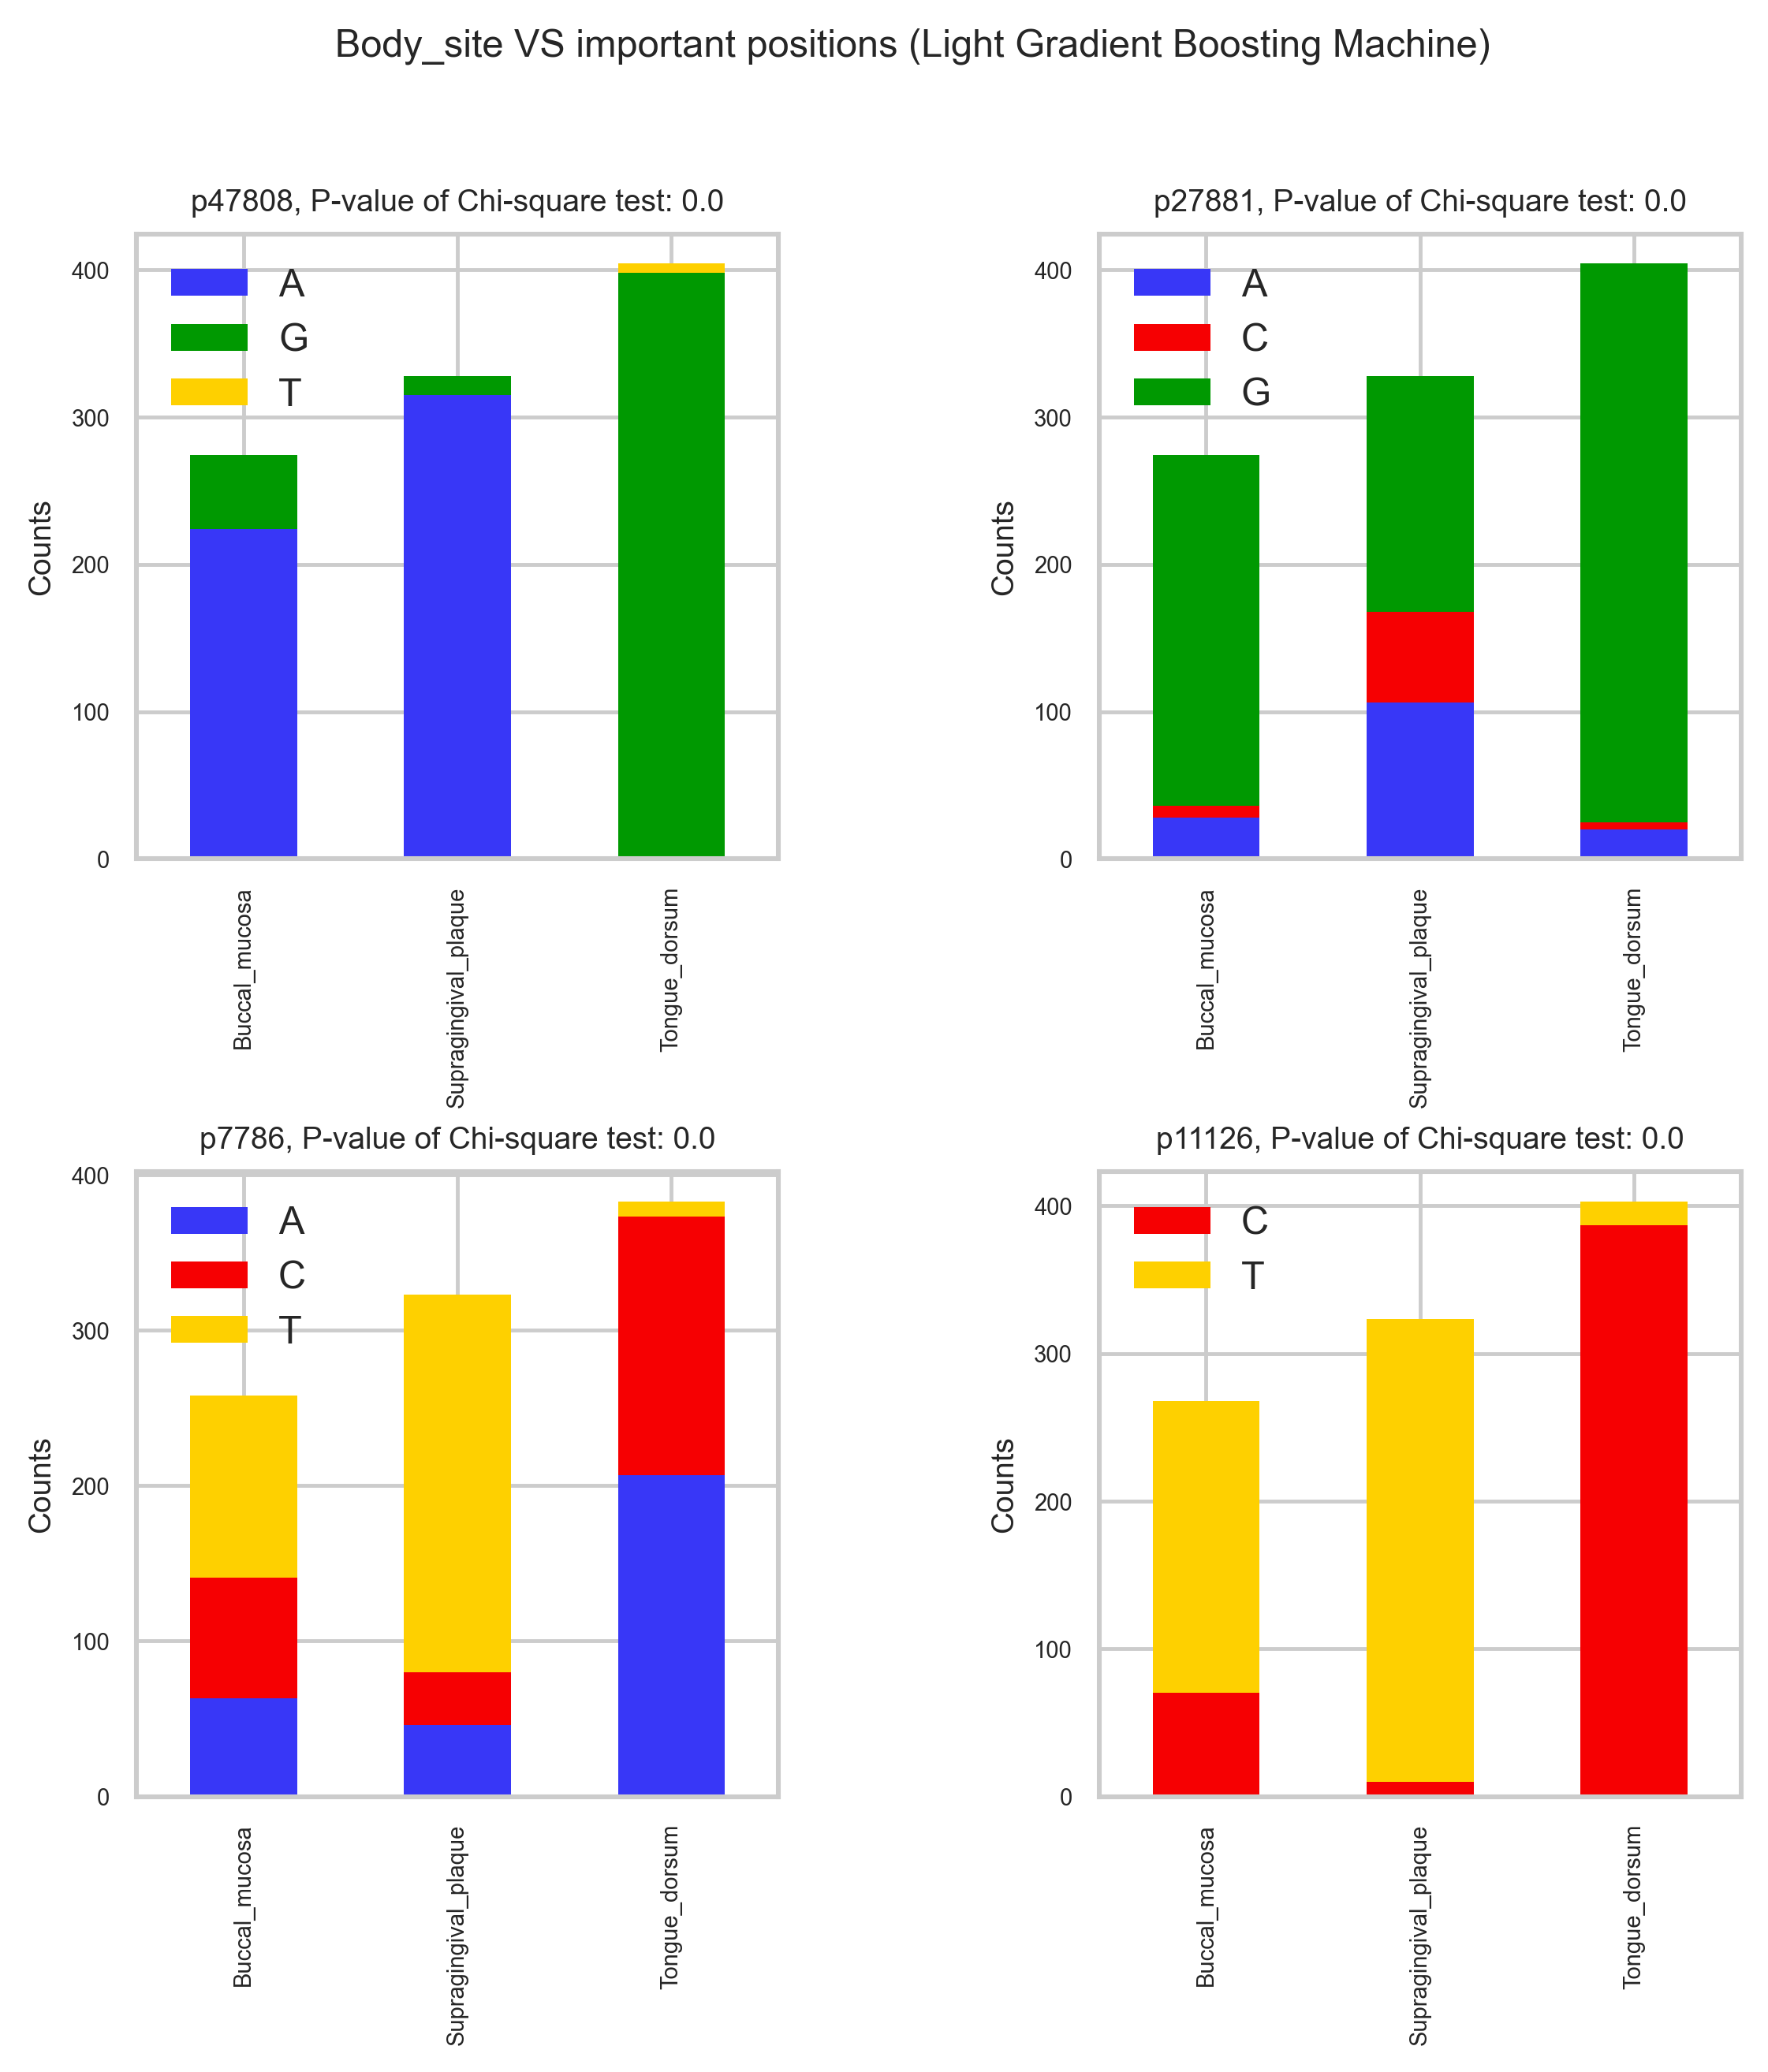

In [18]:
for i in range(3):
    imp = ml.fimp_single(trained_model=top_models[i], model_name=model_names[i], 
                  train_cols=train_cols, grouped_features=dc_df,
                  n_positions=df.shape[1],report_dir=report_dir)
    viz.dp_plot(dat = imp, model_name= model_names[i],imp_col='standard_value', report_dir=report_dir)
    
    viz.plot_imp_model(dat =df, trained_model = top_models[i], model_name = model_names[i],
               train_cols= train_cols, grouped_features = dc_df,
                   meta_var = mt, n_positions = df.shape[1], model_type = anaType, report_dir = report_dir)

/Users/mbagh/Documents/RahLab/deepBreaks_data/hmp/s__Haemophilus_parainfluenzae_Body_site_2022-06-29_12-08-59/mean_350.png


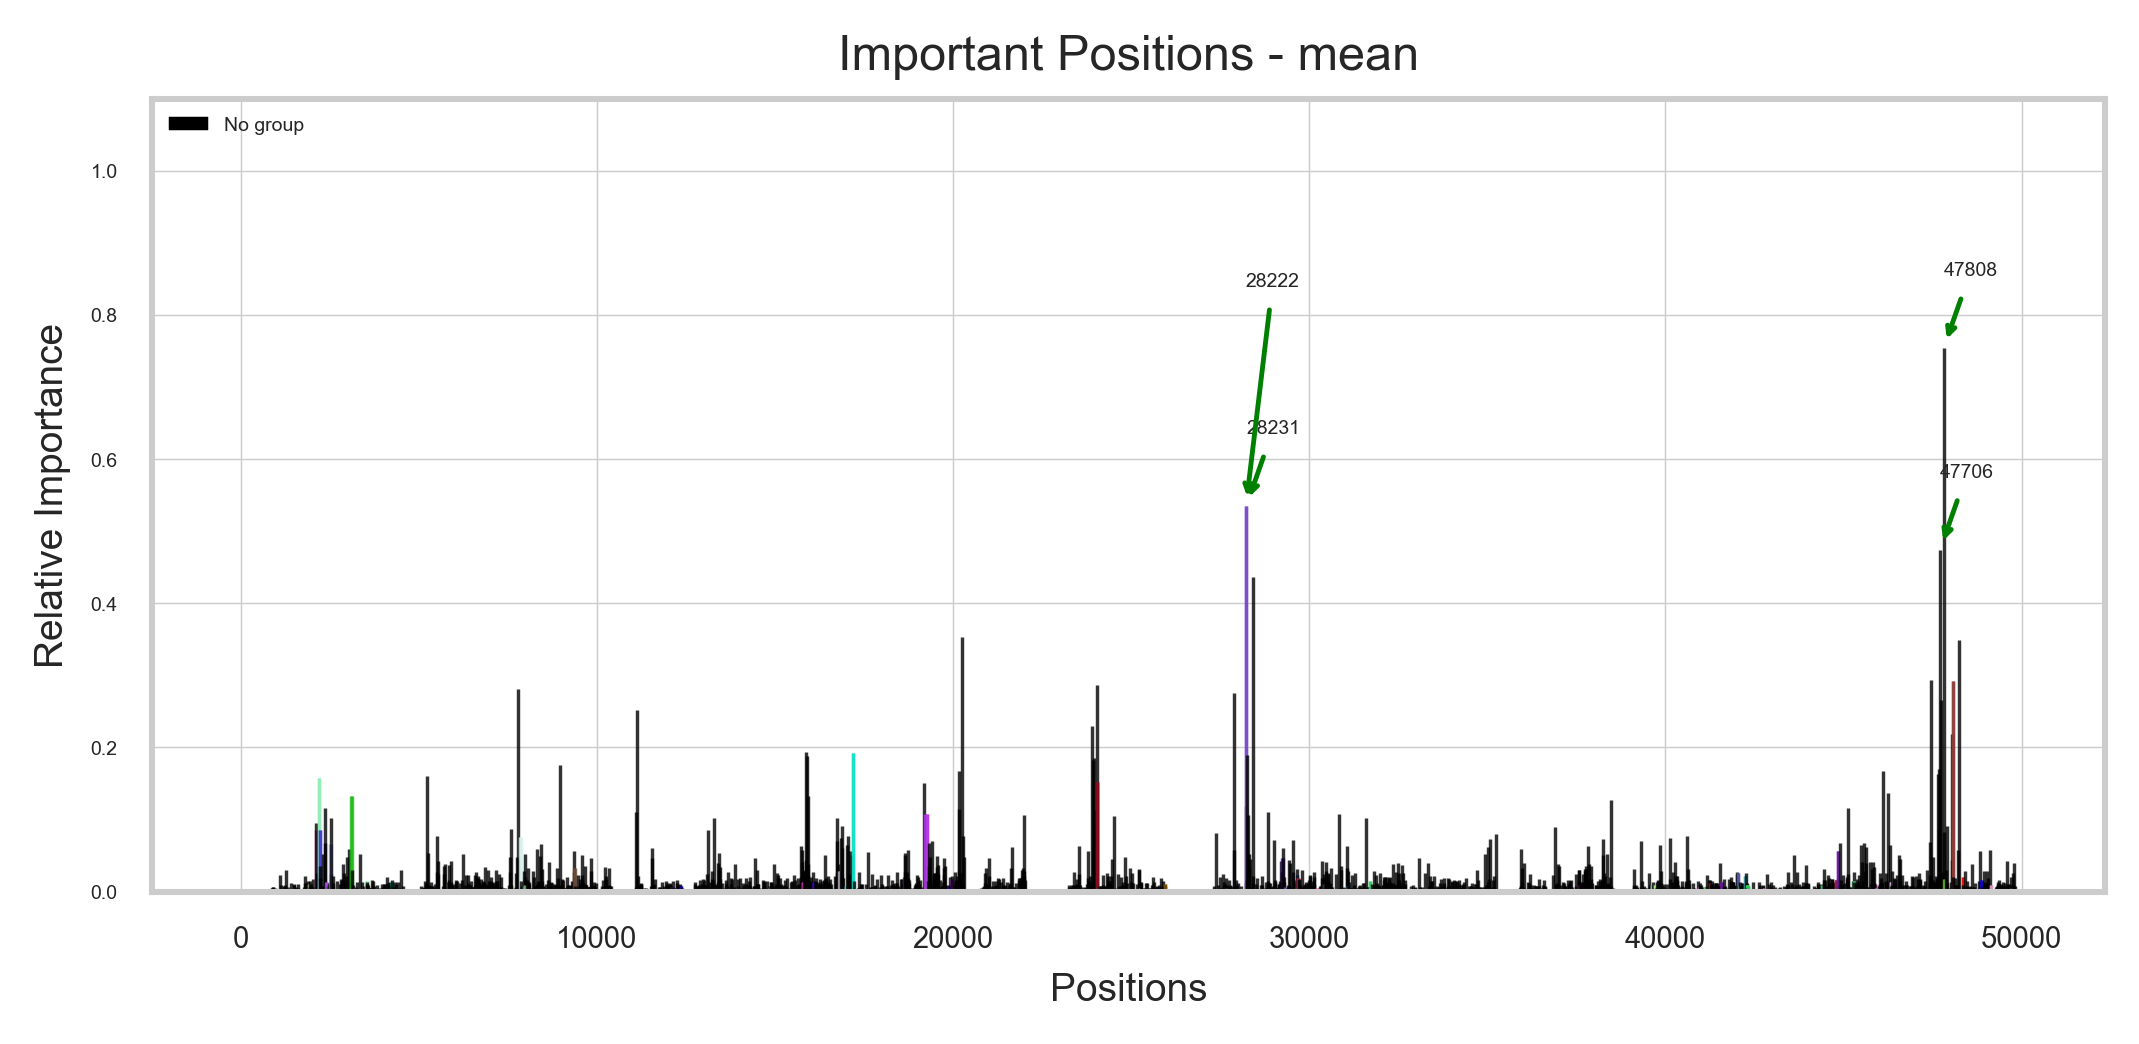

/Users/mbagh/opt/anaconda3/envs/deepBreaks_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/mbagh/opt/anaconda3/envs/deepBreaks_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/mbagh/opt/anaconda3/envs/deepBreaks_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/mbagh/opt/anaconda3/envs/deepBreaks_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, 

In [19]:
mean_imp = ml.fimp_top_models(trained_models=top_models, model_names=model_names, train_cols=train_cols,grouped_features=dc_df,
                  n_positions=df.shape[1],report_dir=report_dir)
viz.dp_plot(dat = mean_imp, model_name= 'mean',imp_col='mean_imp', report_dir=report_dir)

In [ ]:
# viz.plot_imp_all(trained_models=top_models, dat=df_cleaned, train_cols=train_cols,
#              grouped_features=dc_df, meta_var = mt, model_type = anaType,
#              n_positions= df.shape[1], report_dir = report_dir)